# Artificial Intelligence
## UEMH3073 / UECS2053 / UECS2153

# Lab 2: Genetic Algorithm

This notebook is an assignment requiring you to investigate the Travelling Salesman Problem. Guidance is provided so you can understand what needs to be done for this assignment as you follow through this lab. Convenience classes and functions/ methods are provided.

You will encounter #TODO in the code cells explaining tasks you need to complete. In other words, you will need to write codes and accomplish the #TODO tasks so that the genetic algorithm functions well and runs correctly. Look for "Replacement starts here" and "Replacement ends here" to know the parts of the codes requiring your inputs.
    

The #TODO tasks and their marks distribution are as follows:
 
a. #TODO1 (10 marks) in the Population Initialization function. You will read a set of cities from the filename when creating an initial population. 

b. #TODO2 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Tournament Selection. 

c. #TODO3 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Proportional Selection.

d. #TODO4 (10 marks) in the Survival Selection function. You will replace the dummy survival selection function with Merge, Sort & Truncate. 
    
e. #TODO5 (10 marks) in the Crossover function. You will replace the dummy crossover function the Partially Mapped Crossover approach.

f. #TODO6 (10 marks) in the Mutation function. You will replace the dummy mutation function with Insertion Mutation approach. 

g. #TODO7 (10 marks) in Performance Evaluation. You will present performance evaluation for the different Parent Selection functions. 

Marks are also given for: Report Presentation and Formatting (15%) and Code Quality and Comments (15%). More details about this notebook and assignemnt are provided in your lab sheet.

## An Overview of the Travelling Salesman Problem

In the travelling salesman problem, a salesperson wish to find the shortest path that passes through all cities s/he wishes to visit given the coordinates of a set of cities. The salesperson should visit each of the cities once only, and so:

a. Each path consists all cities in the set.

b. Each path visits each of the cities once only. So, none of the cities are visited more than once. 

## Imports

In [1]:
%matplotlib inline

# Please add more imports if you need them 

import random
import time
import csv
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint as print 

## Convenience Classes

### City

The City class, which represents a city, possesses the properties of the city and has functions/ methods used for calculating the distance between the city and another city. Each path, represented by a chromosome, is formed by a set of cities.   

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

### Fitness

The Fitness class, which represents the fitness function, possesses the properties of a path and has functions/methods used for calculating the fitness value of the path, which is based on the distance of the path. 

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = None
        self.fitness = None
    
    def routeDistance(self):
        if self.distance == None:
            pathDistance = 0.0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == None:
        # Fitness function (Simple division) that uses a simple 
        # division that divides one by the distance of the path
            self.fitness = 1 / float(self.routeDistance()) 
            # Note: You must ensure a division by zero does not occur 
        return self.fitness


## Population Initialization  

The population initialization function (or method) performs random initialization. This creates an initial population with completely random chromosomes (or solutions). There are three functions related to population initialization. 

The first function is genCityList() which generates a set of cities from a file.  

In [4]:
def genCityList(filename):
    cityList = []
    
    # TODO 1 (10 marks) - Replace the following codes that generate 10 random cities.
    # Your new implementation must read a set of cities from the filename to be used for creating 
    # an initial population.  
    
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors with slight effects on the fitness value.
    # >0 to <5 marks: Major errors with significant effects on the fitness value. 
    # 0 marks:        No answer is given. 
    
    # Replacement starts here    
    with open(filename, "r") as file:      # Read as corresponding file as "file"
        reader = csv.reader(file)          # Read "file" in csv format
        
        next(reader)                       # Skip the header row
        
        for line in reader:                # Iterate for each line in "csv"
            _, x, y = map(int, line)       # Mapping x and y into int datatype
            cityList.append(City(x, y))    # Append City object to the cityList with corresponding x, y value
    # Replacement ends here
    
    return cityList

# Testing genCityList function
filename = "cities50.txt"
population = genCityList(filename)

The second function is createRoute() which generates a random route (chromosome) from a set of City instances.

In [5]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

The third function is initialPopulation() which calls the second function repeatedly to create an initial population (a list of routes).

In [6]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 10 cities in cityList as follows:

In [7]:
cityList = genCityList('cities50.txt') 
print(cityList)

[(34,83),
 (61,21),
 (77,16),
 (9,23),
 (56,77),
 (89,52),
 (29,58),
 (26,39),
 (75,44),
 (92,75),
 (36,1),
 (79,36),
 (1,77),
 (45,86),
 (57,30),
 (6,11),
 (97,66),
 (44,66),
 (48,32),
 (28,98),
 (76,88),
 (84,43),
 (70,32),
 (7,26),
 (95,51),
 (10,34),
 (78,28),
 (40,64),
 (39,40),
 (10,31),
 (59,3),
 (57,57),
 (100,64),
 (76,63),
 (52,35),
 (80,68),
 (98,61),
 (95,97),
 (33,60),
 (44,29),
 (15,46),
 (94,70),
 (69,80),
 (35,46),
 (14,74),
 (78,60),
 (92,57),
 (20,91),
 (15,34),
 (12,18)]


Sample run 2 initializes 10 cities in cityList and creates a population with three routes as follows:

In [8]:
cityList = genCityList('cities50.txt') 
population = initialPopulation(3, cityList) 
print(population)

[[(89,52),
  (69,80),
  (15,34),
  (45,86),
  (84,43),
  (57,57),
  (7,26),
  (14,74),
  (92,75),
  (44,66),
  (40,64),
  (10,34),
  (28,98),
  (44,29),
  (76,88),
  (79,36),
  (1,77),
  (6,11),
  (20,91),
  (29,58),
  (92,57),
  (15,46),
  (95,97),
  (78,28),
  (26,39),
  (10,31),
  (97,66),
  (95,51),
  (100,64),
  (61,21),
  (34,83),
  (70,32),
  (57,30),
  (59,3),
  (75,44),
  (80,68),
  (52,35),
  (33,60),
  (39,40),
  (56,77),
  (94,70),
  (98,61),
  (35,46),
  (12,18),
  (36,1),
  (77,16),
  (9,23),
  (48,32),
  (76,63),
  (78,60)],
 [(98,61),
  (76,63),
  (92,75),
  (40,64),
  (44,66),
  (80,68),
  (29,58),
  (45,86),
  (59,3),
  (75,44),
  (28,98),
  (78,60),
  (6,11),
  (97,66),
  (95,51),
  (10,34),
  (69,80),
  (1,77),
  (39,40),
  (89,52),
  (100,64),
  (48,32),
  (33,60),
  (7,26),
  (12,18),
  (26,39),
  (95,97),
  (9,23),
  (14,74),
  (34,83),
  (15,46),
  (77,16),
  (52,35),
  (70,32),
  (92,57),
  (56,77),
  (10,31),
  (79,36),
  (57,57),
  (57,30),
  (35,46),
  (78,2

## Selection

Parents selection selects chromosomes with high fitness values from a population. Survivor selection selects chromosomes with higher fitness values to form the population of the next generation. The population size is len(population), so we have len(population) in this population. 

### Parent Selection

There are three implementations for parent selection. The first parentSelection() performs random selection.

In [9]:
def randomSelection(population, poolSize=None):
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    for i in range(0, poolSize):
        fitness = Fitness(population[i]).routeFitness()
        matingPool.append(random.choice(population))
      
    return matingPool

The second parentSelection() performs Tournament Selection.

In [10]:
def tournamentSelection(population, poolSize=None):
    
    # TODO 2 (10 marks) - Replace the dummy parent selection function below with  
    # Tournament Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    # Replacement starts here
    
    # Determine the tournament size as 10% of the population size, with a minimum of 2
    tournamentSize = max(2, math.ceil(len(population) / 10))
    
    for _ in range(poolSize):
        # Randomly select individuals for the tournament
        tournament = random.sample(population, tournamentSize)
        
        # Select the individual with the best (minimum) route distance from the tournament
        best = min(tournament, key=lambda route: Fitness(route).routeDistance())
        
        # Add the selected individual to the mating pool
        matingPool.append(best)
    # Replacement ends here
    
    return matingPool

The third parentSelection() performs Proportional Selection.

In [11]:
def proportionalSelection(population, poolSize=None):
    
    # TODO 3 (10 marks) - Replace the dummy parent selection function below with  
    # Proportional Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    # Replacement starts here
    fitness_results = []

    # Fitness of each route in the population is calculated
    for individual in population:
        fitness = Fitness(individual).routeFitness()
        fitness_results.append((individual, fitness))

    # Routes based on fitness in descending order are sorted
    # Higher fitness is better
    ranked_routes = sorted(fitness_results, key=lambda x: x[1], reverse=True)
    
    # Roulette wheel is set up
    df = pd.DataFrame(np.array(ranked_routes, dtype=object), columns=["Route", "Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()
    
    # Individuals for the mating pool are selected
    while len(matingPool) < poolSize:
        pick = 100 * random.random()  # "Spin the wheel" to generate values
        for i in range(len(df)):
            if pick <= df.iat[i, 3]:  # Survivor is selected based on value generated
                matingPool.append(df.iat[i, 0])
                break
    # Replacement ends here
    
    return matingPool

### Survival Selection

In [12]:
def survivorSelection(population, eliteSize):
    
    # TODO 4 (10 marks) - Replace the dummy survival selection function below with  
    # Merge, Sort & Truncate.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    elites = []
    
    # Replacement starts here
    
    # Merge chromosome with their fitness score into new list
    population_with_fitness = [(chromosome, Fitness(chromosome).routeFitness()) for chromosome in population]

        
    # Sort the chromosome based on their fitness score in descending order
    population_with_fitness.sort(key=lambda x: x[1], reverse=True)

    # Select the top eliteSize number of chromosomes
    elites = [chromosome for chromosome, _ in population_with_fitness[:eliteSize]]
        
    # Replacement ends here
    
    return elites

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code. 

Sample run 1 initializes 10 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:

In [13]:
population = initialPopulation(4, genCityList('cities50.txt'))
matingpool = randomSelection(population, 4) 
print('Initial population') 
print(population) 
print('Mating pool') 
print(matingpool)

'Initial population'
[[(78,60),
  (57,57),
  (94,70),
  (95,97),
  (44,29),
  (69,80),
  (75,44),
  (28,98),
  (44,66),
  (98,61),
  (52,35),
  (76,63),
  (10,31),
  (56,77),
  (12,18),
  (80,68),
  (40,64),
  (33,60),
  (57,30),
  (92,57),
  (35,46),
  (15,46),
  (14,74),
  (95,51),
  (6,11),
  (77,16),
  (15,34),
  (1,77),
  (70,32),
  (78,28),
  (20,91),
  (84,43),
  (89,52),
  (59,3),
  (26,39),
  (100,64),
  (48,32),
  (29,58),
  (97,66),
  (92,75),
  (36,1),
  (9,23),
  (7,26),
  (45,86),
  (34,83),
  (79,36),
  (39,40),
  (10,34),
  (61,21),
  (76,88)],
 [(1,77),
  (44,29),
  (33,60),
  (15,46),
  (40,64),
  (57,57),
  (6,11),
  (12,18),
  (70,32),
  (10,31),
  (92,75),
  (75,44),
  (10,34),
  (39,40),
  (14,74),
  (7,26),
  (9,23),
  (95,97),
  (26,39),
  (100,64),
  (29,58),
  (52,35),
  (20,91),
  (45,86),
  (48,32),
  (36,1),
  (15,34),
  (92,57),
  (78,60),
  (84,43),
  (61,21),
  (59,3),
  (98,61),
  (94,70),
  (76,88),
  (28,98),
  (89,52),
  (77,16),
  (78,28),
  (56,77)

In [14]:
population = initialPopulation(4, genCityList('cities50.txt'))
matingpool = tournamentSelection(population, 4) 
print('Initial population') 
print(population) 
print('Mating pool') 
print(matingpool)

'Initial population'
[[(1,77),
  (79,36),
  (89,52),
  (15,46),
  (39,40),
  (34,83),
  (10,34),
  (76,88),
  (69,80),
  (61,21),
  (35,46),
  (48,32),
  (33,60),
  (12,18),
  (52,35),
  (14,74),
  (94,70),
  (57,30),
  (80,68),
  (44,29),
  (76,63),
  (78,28),
  (45,86),
  (59,3),
  (92,57),
  (26,39),
  (20,91),
  (15,34),
  (77,16),
  (29,58),
  (84,43),
  (7,26),
  (10,31),
  (75,44),
  (78,60),
  (57,57),
  (40,64),
  (9,23),
  (28,98),
  (97,66),
  (100,64),
  (98,61),
  (92,75),
  (6,11),
  (56,77),
  (70,32),
  (95,51),
  (36,1),
  (44,66),
  (95,97)],
 [(52,35),
  (92,57),
  (28,98),
  (57,30),
  (95,51),
  (29,58),
  (14,74),
  (89,52),
  (59,3),
  (56,77),
  (12,18),
  (100,64),
  (36,1),
  (76,63),
  (1,77),
  (61,21),
  (35,46),
  (44,66),
  (78,60),
  (70,32),
  (98,61),
  (97,66),
  (75,44),
  (94,70),
  (15,46),
  (79,36),
  (95,97),
  (26,39),
  (9,23),
  (76,88),
  (69,80),
  (15,34),
  (10,34),
  (44,29),
  (7,26),
  (77,16),
  (45,86),
  (84,43),
  (39,40),
  (34,83

In [15]:
population = initialPopulation(4, genCityList('cities50.txt'))
matingpool = proportionalSelection(population, 4) 
print('Initial population') 
print(population) 
print('Mating pool') 
print(matingpool)

'Initial population'
[[(6,11),
  (80,68),
  (98,61),
  (75,44),
  (77,16),
  (92,57),
  (52,35),
  (33,60),
  (26,39),
  (34,83),
  (39,40),
  (14,74),
  (97,66),
  (57,30),
  (10,31),
  (92,75),
  (61,21),
  (95,51),
  (36,1),
  (84,43),
  (48,32),
  (70,32),
  (40,64),
  (69,80),
  (1,77),
  (79,36),
  (78,28),
  (44,29),
  (56,77),
  (15,46),
  (94,70),
  (95,97),
  (45,86),
  (7,26),
  (28,98),
  (12,18),
  (29,58),
  (100,64),
  (59,3),
  (9,23),
  (89,52),
  (76,88),
  (57,57),
  (78,60),
  (20,91),
  (10,34),
  (76,63),
  (15,34),
  (35,46),
  (44,66)],
 [(76,63),
  (48,32),
  (89,52),
  (33,60),
  (80,68),
  (10,31),
  (76,88),
  (7,26),
  (28,98),
  (95,97),
  (52,35),
  (29,58),
  (79,36),
  (84,43),
  (44,66),
  (98,61),
  (100,64),
  (57,57),
  (78,28),
  (77,16),
  (1,77),
  (35,46),
  (69,80),
  (78,60),
  (59,3),
  (95,51),
  (45,86),
  (57,30),
  (9,23),
  (15,46),
  (36,1),
  (15,34),
  (39,40),
  (94,70),
  (6,11),
  (61,21),
  (12,18),
  (92,75),
  (70,32),
  (10,34)

Sample run 2 initializes 10 cities in cityList, creates a population with four routes, select an elite chromosome as follows:

In [16]:
population = initialPopulation(4, genCityList('cities50.txt'))
elites = survivorSelection(population, 5)
print('Initial population')
print(population)
print('Selected elites')
print(elites)

'Initial population'
[[(10,31),
  (61,21),
  (10,34),
  (59,3),
  (100,64),
  (48,32),
  (77,16),
  (15,46),
  (76,88),
  (78,60),
  (84,43),
  (40,64),
  (28,98),
  (94,70),
  (35,46),
  (52,35),
  (39,40),
  (20,91),
  (1,77),
  (9,23),
  (98,61),
  (44,29),
  (97,66),
  (92,57),
  (79,36),
  (70,32),
  (76,63),
  (12,18),
  (15,34),
  (89,52),
  (75,44),
  (6,11),
  (7,26),
  (69,80),
  (92,75),
  (78,28),
  (80,68),
  (44,66),
  (57,30),
  (34,83),
  (29,58),
  (26,39),
  (33,60),
  (57,57),
  (95,97),
  (95,51),
  (45,86),
  (56,77),
  (36,1),
  (14,74)],
 [(20,91),
  (76,63),
  (95,97),
  (15,46),
  (34,83),
  (10,34),
  (44,29),
  (84,43),
  (78,60),
  (70,32),
  (9,23),
  (94,70),
  (52,35),
  (79,36),
  (48,32),
  (78,28),
  (57,30),
  (44,66),
  (10,31),
  (6,11),
  (95,51),
  (45,86),
  (28,98),
  (7,26),
  (76,88),
  (12,18),
  (26,39),
  (36,1),
  (69,80),
  (61,21),
  (89,52),
  (92,75),
  (33,60),
  (59,3),
  (56,77),
  (98,61),
  (40,64),
  (14,74),
  (15,34),
  (75,44)

## Crossover


Crossover selects two parents, crossover the genetic materials of the parents, and produce one or more children. In the Travelling Salesman Problem, each travelling path must be valid. Each path consists all cities in the set, and each path visits each of the cities once only. So, none of the cities are visited more than once. Exchanging parts of two chromosomes tend to produce invalid paths. As an example, Parent 1 is [2 1 0 7 3 5 4 6] and Parent 2 is [6 1 0 5 2 3 4 7]. One point crossover at midpoint generates Child 1 [2 1 0 7 2 3 4 7] and Child 2 [6 1 0 5 3 5 4 6]. Both children are invalid paths.     

In [17]:
def crossover(parent1, parent2):
    
    # TODO 5 (10 marks) - Replace the dummy crossover function below with 
    # Partially Mapped Crossover approach.
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # Replacement starts here
    size = len(parent1)
    point1, point2 = sorted(random.sample(range(size), 2))

    # Initialize offspring with None
    child1 = [None] * size
    child2 = [None] * size

    # Copy the segment from parents to children
    child1[point1:point2+1] = parent1[point1:point2+1]
    child2[point1:point2+1] = parent2[point1:point2+1]

    # Function to fill the remaining positions in child
    def fill_child(child, parent, point1, point2):
        # Copy the non-segment part of parent to the child
        current_index = (point2 + 1) % size
        for i in range(size):
            if i < point1 or i > point2:
                while parent[current_index] in child:
                    current_index = (current_index + 1) % size
                child[i] = parent[current_index]
                current_index = (current_index + 1) % size

    fill_child(child1, parent2, point1, point2)
    fill_child(child2, parent1, point1, point2)
    # Replacement ends here
    
    return child1, child2

Crossover selects two parents from the mating pool to produce a new generation of the same size.

In [18]:
def breedPopulation(matingpool):
    children = []
    
    # Choosing parents in their order of presence in the mating pool. Choosing parents
    # in a random manner is possible. 
    
    for i in range(1, len(matingpool), 2):
        child1, child2 = crossover(matingpool[i-1], matingpool[i])
        children.append(child1)
        children.append(child2)
    
    return children

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes 2 chromosomes in the population, and performs crossover among the two parents. 

In [19]:
population = initialPopulation(2, genCityList('cities50.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

'Parents'
[(33,60),
 (59,3),
 (7,26),
 (36,1),
 (89,52),
 (52,35),
 (12,18),
 (92,75),
 (84,43),
 (75,44),
 (10,31),
 (57,57),
 (69,80),
 (15,34),
 (80,68),
 (6,11),
 (70,32),
 (98,61),
 (78,28),
 (14,74),
 (76,63),
 (1,77),
 (92,57),
 (79,36),
 (39,40),
 (94,70),
 (20,91),
 (29,58),
 (40,64),
 (10,34),
 (28,98),
 (45,86),
 (57,30),
 (15,46),
 (26,39),
 (100,64),
 (48,32),
 (95,51),
 (44,29),
 (44,66),
 (35,46),
 (78,60),
 (97,66),
 (56,77),
 (34,83),
 (77,16),
 (76,88),
 (9,23),
 (61,21),
 (95,97)]
[(79,36),
 (39,40),
 (57,30),
 (56,77),
 (61,21),
 (6,11),
 (10,31),
 (26,39),
 (20,91),
 (70,32),
 (52,35),
 (1,77),
 (94,70),
 (36,1),
 (75,44),
 (28,98),
 (92,57),
 (7,26),
 (84,43),
 (44,29),
 (95,97),
 (9,23),
 (10,34),
 (35,46),
 (76,63),
 (48,32),
 (57,57),
 (14,74),
 (69,80),
 (76,88),
 (33,60),
 (95,51),
 (100,64),
 (59,3),
 (77,16),
 (97,66),
 (92,75),
 (89,52),
 (78,60),
 (44,66),
 (45,86),
 (15,46),
 (34,83),
 (15,34),
 (80,68),
 (29,58),
 (12,18),
 (78,28),
 (98,61),
 (40,64)]


## Mutation

Mutation mutates a single chromosome to get a mutated chromosome so that genetic algorithm can converge to a shorter path quickly. In the Travelling Saleman Problem, a mutated chromosome must be a valid path. As an example, the insertion mutation randomly inserts a single gene in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 2 4 5 6 7 3 8 9 10] mutated chromosome. Step 1: select a gene randomly, Step 2: insert this gene into a randomly selected location.

In [20]:
def mutate(route, mutationProbability):
    
    # TODO 6 (10 marks) - Replace the dummy mutation function below with Insertion Mutation.
    # The dummy mutation function simply swaps a city with the city before it.  
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
     
    mutated_route = route[:]
    for i in range(len(route)):
        if (random.random() < mutationProbability):
            # mutationProbability is the probability of a gene undergoing mutation
            
            # Replacement starts here
            
            # Choose a gene to move
            gene_to_move_index = random.randint(0, len(mutated_route) - 1)
            gene_to_move = mutated_route.pop(gene_to_move_index)
            
            # Choose a new position to insert the gene
            new_position = random.randint(0, len(mutated_route))
            
            # Insert the gene at the new position
            mutated_route.insert(new_position, gene_to_move)

            # Replacement ends here
    return mutated_route

Mutation runs over the entire population and mutates each chromosome in the population with a small mutationProbability. 

In [21]:
def mutation(population, mutationProbability):
    mutatedPopulation = []
    for i in range(0, len(population)):
        mutatedIndividual = mutate(population[i], mutationProbability)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a route comprised of 10 cities in cityList, and then mutates it as follows:

In [22]:
route = genCityList('cities50.txt')
mutated = mutate(route, 1)  # Give a pretty high chance for mutation
print('Original route')
print(route)
print('Mutated route')
print(mutated)

'Original route'
[(34,83),
 (61,21),
 (77,16),
 (9,23),
 (56,77),
 (89,52),
 (29,58),
 (26,39),
 (75,44),
 (92,75),
 (36,1),
 (79,36),
 (1,77),
 (45,86),
 (57,30),
 (6,11),
 (97,66),
 (44,66),
 (48,32),
 (28,98),
 (76,88),
 (84,43),
 (70,32),
 (7,26),
 (95,51),
 (10,34),
 (78,28),
 (40,64),
 (39,40),
 (10,31),
 (59,3),
 (57,57),
 (100,64),
 (76,63),
 (52,35),
 (80,68),
 (98,61),
 (95,97),
 (33,60),
 (44,29),
 (15,46),
 (94,70),
 (69,80),
 (35,46),
 (14,74),
 (78,60),
 (92,57),
 (20,91),
 (15,34),
 (12,18)]
'Mutated route'
[(34,83),
 (56,77),
 (89,52),
 (95,51),
 (57,57),
 (79,36),
 (92,75),
 (36,1),
 (1,77),
 (45,86),
 (57,30),
 (6,11),
 (97,66),
 (95,97),
 (48,32),
 (100,64),
 (70,32),
 (84,43),
 (12,18),
 (98,61),
 (44,66),
 (52,35),
 (7,26),
 (75,44),
 (40,64),
 (92,57),
 (77,16),
 (26,39),
 (9,23),
 (10,34),
 (78,28),
 (29,58),
 (28,98),
 (59,3),
 (15,46),
 (14,74),
 (80,68),
 (69,80),
 (33,60),
 (78,60),
 (61,21),
 (76,88),
 (44,29),
 (94,70),
 (76,63),
 (20,91),
 (35,46),
 (10,31

## Running One Generation (or Interation)

Here, we run one generation of genetic algorithm. 

In [23]:
def oneGeneration(population, eliteSize, mutationProbability, parentSelection):
    
    # First we preserve the elites
    elites = survivorSelection(population, eliteSize)
    
    # Then we calculate what our mating pool size should be and generate
    # the mating pool
    poolSize = len(population) - eliteSize
    matingpool = parentSelection(population, poolSize)
        
    # Then we perform crossover on the mating pool
    children = breedPopulation(matingpool)
    
    # We combine the elites and children into one population
    new_population = elites + children
    
    # We mutate the population
    mutated_population = mutation(new_population, mutationProbability)
        
    return mutated_population

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a population comprised of 5 chromosomes based on 10 cities in cityList, and then run one generation (or iteration) of genetic algorithm as follows:

In [24]:
population = initialPopulation(5, genCityList('cities50.txt'))
eliteSize = 1
mutationProbability = 0.01
new_population = oneGeneration(population, eliteSize, mutationProbability, randomSelection)
print('Initial population')
print(population)
print('New population')
print(new_population)

'Initial population'
[[(89,52),
  (94,70),
  (76,63),
  (44,29),
  (95,51),
  (92,57),
  (20,91),
  (59,3),
  (10,31),
  (7,26),
  (9,23),
  (52,35),
  (29,58),
  (39,40),
  (75,44),
  (80,68),
  (1,77),
  (26,39),
  (57,57),
  (84,43),
  (56,77),
  (97,66),
  (78,60),
  (14,74),
  (69,80),
  (15,46),
  (12,18),
  (98,61),
  (44,66),
  (10,34),
  (36,1),
  (78,28),
  (33,60),
  (28,98),
  (57,30),
  (61,21),
  (45,86),
  (95,97),
  (77,16),
  (76,88),
  (35,46),
  (40,64),
  (70,32),
  (100,64),
  (79,36),
  (48,32),
  (34,83),
  (6,11),
  (92,75),
  (15,34)],
 [(57,57),
  (59,3),
  (48,32),
  (80,68),
  (94,70),
  (75,44),
  (44,66),
  (28,98),
  (10,31),
  (39,40),
  (40,64),
  (33,60),
  (1,77),
  (76,88),
  (78,28),
  (69,80),
  (20,91),
  (45,86),
  (56,77),
  (44,29),
  (95,97),
  (77,16),
  (92,75),
  (79,36),
  (26,39),
  (7,26),
  (35,46),
  (9,23),
  (12,18),
  (29,58),
  (78,60),
  (52,35),
  (57,30),
  (34,83),
  (15,46),
  (84,43),
  (36,1),
  (6,11),
  (15,34),
  (70,32),

## Running Many Generations (or Interations) 

'Iteration 0, Best distance: 25944.550565938785'
'Iteration 1, Best distance: 25944.57317642486'
'Iteration 2, Best distance: 25803.104618465662'
'Iteration 3, Best distance: 25824.595524323104'
'Iteration 4, Best distance: 25842.014137817983'
'Iteration 5, Best distance: 25041.02403519263'
'Iteration 6, Best distance: 25059.804927490408'
'Iteration 7, Best distance: 24971.377600078227'
'Iteration 8, Best distance: 25085.303962104696'
'Iteration 9, Best distance: 25092.37259478347'
'Iteration 10, Best distance: 25012.192954918366'
'Iteration 11, Best distance: 25041.4681072074'
'Iteration 12, Best distance: 25019.243069738757'
'Iteration 13, Best distance: 24792.29411983369'
'Iteration 14, Best distance: 24677.45163373992'
'Iteration 15, Best distance: 24625.302361015536'
'Iteration 16, Best distance: 24736.96971748009'
'Iteration 17, Best distance: 24747.513460402795'
'Iteration 18, Best distance: 24679.95817977335'
'Iteration 19, Best distance: 24627.450316502123'
'Iteration 20, Best

'Iteration 2, Best distance: 25062.409186279394'
'Iteration 3, Best distance: 25083.92359108424'
'Iteration 4, Best distance: 25190.72938474825'
'Iteration 5, Best distance: 25081.11273434079'
'Iteration 6, Best distance: 24903.956294584415'
'Iteration 7, Best distance: 24822.039245569762'
'Iteration 8, Best distance: 24811.087358685454'
'Iteration 9, Best distance: 24454.495587538764'
'Iteration 10, Best distance: 24427.605378664713'
'Iteration 11, Best distance: 24295.86678603435'
'Iteration 12, Best distance: 24407.51884969217'
'Iteration 13, Best distance: 24279.18833434821'
'Iteration 14, Best distance: 24320.595671374253'
'Iteration 15, Best distance: 24293.056838839966'
'Iteration 16, Best distance: 24269.71037502223'
'Iteration 17, Best distance: 24247.518388574495'
'Iteration 18, Best distance: 24142.033666678602'
'Iteration 19, Best distance: 24167.528799405336'
'Iteration 20, Best distance: 23810.713676520783'
'Iteration 21, Best distance: 23711.569035200086'
'Iteration 22, 

'Iteration 2, Best distance: 25259.48974411897'
'Iteration 3, Best distance: 25106.88036937576'
'Iteration 4, Best distance: 25000.709043385454'
'Iteration 5, Best distance: 25020.669186873914'
'Iteration 6, Best distance: 24946.256889541506'
'Iteration 7, Best distance: 24968.698043963737'
'Iteration 8, Best distance: 24939.885064770653'
'Iteration 9, Best distance: 24866.624298862458'
'Iteration 10, Best distance: 24899.517397962398'
'Iteration 11, Best distance: 24829.232609946263'
'Iteration 12, Best distance: 24674.914812558607'
'Iteration 13, Best distance: 24719.895879243257'
'Iteration 14, Best distance: 24616.242366352566'
'Iteration 15, Best distance: 24574.378915922363'
'Iteration 16, Best distance: 24600.491781269877'
'Iteration 17, Best distance: 24553.93026945172'
'Iteration 18, Best distance: 24615.43879593095'
'Iteration 19, Best distance: 24733.751154999354'
'Iteration 20, Best distance: 24715.845301468336'
'Iteration 21, Best distance: 24612.345801804186'
'Iteration 2

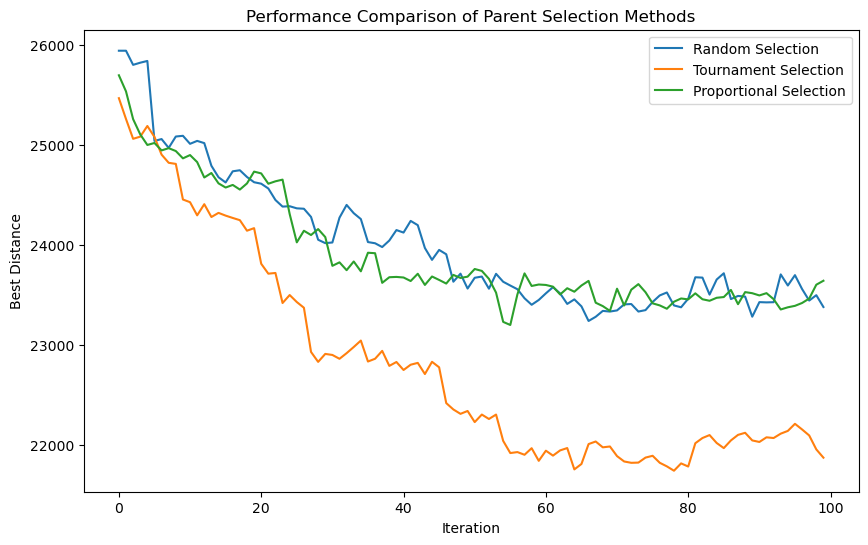

In [25]:
def runGA(parentSelection, cityList, popSize=20, eliteSize=5, mutationProbability=0.01, iteration_limit=100):
    # Initialize the population
    population = initialPopulation(popSize, cityList)
    # List to store the best distance in each iteration
    best_distances = []

    # Iterate for a specified number of generations
    for i in range(iteration_limit):
        # Generate the next generation of the population
        population = oneGeneration(population, eliteSize, mutationProbability, parentSelection)
        # Calculate distances for each route in the population
        distances = [Fitness(p).routeDistance() for p in population]
        # Find the index of the best route (minimum distance)
        index = np.argmin(distances)
        # Retrieve the best route
        best_route = population[index]
        # Retrieve the best distance
        min_dist = min(distances)
        # Store the best distance
        best_distances.append(min_dist)
        # Print the best distance for the current iteration
        print(f"Iteration {i}, Best distance: {min_dist}")

    # Print the optimal path found
    print("Optimal path is " + str(best_route)) 
    
    return best_distances

filename = 'cities500.txt'
popSize = 20
eliteSize = 5
mutationProbability = 0.01
iteration_limit = 100

# Generate the list of cities from the "cities500.txt"
cityList = genCityList(filename)

# Run the GA with Random Selection
random_results = runGA(randomSelection, cityList, popSize, eliteSize, mutationProbability, iteration_limit)
# Run the GA with Tournament Selection
tournament_results = runGA(tournamentSelection, cityList, popSize, eliteSize, mutationProbability, iteration_limit)
# Run the GA with Proportional Selection
proportional_results = runGA(proportionalSelection, cityList, popSize, eliteSize, mutationProbability, iteration_limit)

# Plotting the results
plt.figure(figsize=(10, 6))
# Plot the results for Random Selection
plt.plot(random_results, label="Random Selection")
# Plot the results for Tournament Selection
plt.plot(tournament_results, label="Tournament Selection")
# Plot the results for Proportional Selection
plt.plot(proportional_results, label="Proportional Selection")
plt.xlabel('Iteration')
plt.ylabel('Best Distance')
plt.title('Performance Comparison of Parent Selection Methods')
plt.legend()
plt.show()

    # TODO 7 (10 marks) - Performance Evaluation. You will present the performance achieved 
    # by different parent selection function. You will compare the 
    # performance achieved by Random Selection, Tournament Selection, and Proportional Selection. 
   
    # Marking scheme: 
    # 7 to 10 marks:  In-depth performance evaluation. Optimal routes are found. 
    # 5 to <7 marks:  Clear understanding of performance evaluation.
    # >0 to <5 marks: Inaccurate or unclear understanding of performance evaluation. 
    # 0 marks:        No answer is given. 
    
  